# Quiz de révision

1. Quelles sont les principales utilités de la validation croisée? Pourquoi est-elle utilisée dans ces conditions?
2. Expliquez ce qui distingue les forêts aléatoire de la méthode *bagging*.
3. Pourquoi voudrait-on introduire du biais dans un modèle?
4. Qu'est-ce qui distingue la régression ridge de la régression LASSO?

- Exemple de réponse à la question 1.

La validation croisée à principalement deux utilités. La première est l'évaluation non biaisée de la performance prdictive d'un modèle. En effet, estimer cette performance sur les données utilisées pour entrainer le modèle risque de données une mesure optimiste et donc biaisée de la performance réelle du modèle. Dans le cas extrême, le modèle pourrait surapprendre et prédire très bien les données d'entrainement sans toutefois pouvoir se généraliser à de nouvelles données. L'utilisation de données auxquelles le modèle n'a jamais été exposées est donc nécessaire pour effectuer la bonne mesure de la performance prédictive. Souvent, un groupe test est utilisé. Toutefois, de petits échantillons peuvent faire en sorte que le mise de côté d'une partie des données n'est pas possible. La validation croisée peut donc être une solution.

La seconde utilité est lors de la sélection d'hyperparamètres dans un modèle. Plutôt que de choisir un hyperparamètre au hasard ou en se fiant simplement à son intuition, l'analyste peut utiliser la validation croiseé pour voir quelle valeur d'hyperparamètre permet la meilleure généralisation du modèle.

- Exemple de réponse à la question 2.

La méthode *bagging* utilise le *boostrap* pour obtenir plusieurs échantillons différents tirés de l'échantillon initial. Ces échantillons sont ensuite utilisés pour estimer un modèle prédictif sur chacun d'eux. Lorsqu'une prédiction doit être faite, les données sont fournies à tous ces modèles de façon à obtenir une série de prédictions. Ces prédictions sont ensuite aggrégées afin d'obtenir une seule valeur prédite.

Le problème qui peut survenir avec la méthode *bagging*, c'est que les différents modèles entrainés soient corrélés entre-eux, puisqu'ils partagent plusieurs observations communes. Pour palier à ce problème, les forêts aléatoires restreingnent le nombre de variables candidates pour effectuer les divisions binaires à un sous ensemble de celles-ci. De cette façon, la corrélation entre les différents arbres estimés est brisée, puisque pour chacun d'eux, un sous ensemble différent et aléatoire des variables explicatives peut être utilisé à chaque division.

- Exemple de réponse à la question 3.

L'évaluation de la qualité des prédictions d'un modèle en régression est généralement fait en estimant la moyenne des erreurs quadratiques (MSE). Il est possible de montrer que la MSE peut être décomposée en trois éléments : une erreur aléatoire irréductible, le biais (au carré) du modèle et la variance du modèle. Or, pour tout modèle, il existe un arbitrage entre le biais et la variance de celui-ci. Dans certains cas, il pourrait donc être avantagueux d'introduire du biais dans un modèle afin de réduire la variance et tenter du même coup de réduire la MSE. Généralement, il existe une situation permettant un arbitrage optimal entre le biais et la variance qui minimise la MSE.

- Exemple de réponse à la question 4.

La régression ridge et la régression LASSO sont deux extensions de la régression linéaire imposant une contrainte sur la dimension des coefficients de la régression. Ce qui distingue ces deux modèles est la forme de la contrainte. Dans le cas de la régression ridge, la contrainte imposée sur le modèle correspond à la somme des carrés des coefficients. Dans le cas de la régression LASSO, la contrainte correspond plutôt à la somme des valeurs absolues des coefficients.

L'impact de ces contraintes sur les coefficients estimés est par ailleurs différents. Dans le cas de la régression ridge, la contrainte limite la dimension des coefficients afin que ceux-ci ne prennent pas des valeurs trop importantes. La régression ridge permet également d'estimer une régression linéaire pour un jeu de données qui possèderait plus de variables explicatives que d'observations.

Dans le cas de la régression LASSO, la contrainte fait en sorte que certains coefficients seront fixés exactement à zéro. La régression LASSO a donc la capacité d'effectuer de la sélection de variables pertinentes.

# Introduction à l'analyse de données

## Module 6 : Apprentissage automatique supervisé - Classification

### Par Nicolas Corneau-Tremblay

# Plan du module

***

1. Modèle de probabilité linéaire
2. Mesure de performance
3. Régression logistique
4. Retour sur certaines méthodes
5. Classification naïve bayésienne
6. Analyse discriminante
7. Classification multi classes
7. Devoir

## 6.1 Modèle de probabilité linéaire

***

- Deux types de modèles : prédisent une classe directement et prédisent une probabilité pour chaque classe.
- Ces modèles peuvent être utilisés pour effectuer une classification binaire (deux classes) ou multi classes (plus de deux classes). Ce cours se concentrera la classification binaire. La classification multiclasse sera abordée à la fin du présent module.
- La régresison linéaire a été le premier modèle présenté pour effectuer de la régression. Elle peut être utilisée également pour effectuer de la classification.
- Dans le cas d'une situation à deux classes, la variable dépendante $y$ est une variable binaire plutôt qu'une variable continue.
- Ce modèle s'appelle le modèle de probabilité linéaire.

- En régression linéaire, l'espérance de $y$ est modélisée en fonction de $X$ telle que

$$E[y_i|x_i] = x'_i\beta$$

- De la même façon, la probabilité que $y$ soit égal à un peut également être une fonction de $X$. Le modèle de probabilité linéaire est donc écrit ainsi :

$$E[y_i|x_i] = \Pr(y_i = 1| x_i) = x_i'\beta$$

- Il est à noter que ce modèle génère automatique de l'hétéroscédasticité.

- Exemple avec un jeu de données portant sur le diagnostic d'une masse susceptible d'être un cancer du sein :

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# voir http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
# pour des information sur la base de données
data = load_breast_cancer()
# print(data.DESCR) pour en apprendre plus
benign = pd.Series(data.target)
print("Valeur de y \ny = 0 :", data.target_names[0], " -> ", benign.value_counts()[0],
      "\ny = 1 :", data.target_names[1], " -> ", benign.value_counts()[1],
      "\n--------")
bc_cov = pd.DataFrame(data.data, columns = data.feature_names)
# conserve uniquement les 10 premières variables
bc_cov = bc_cov.iloc[:, 0:10]
print("Dimension de bc_cov :", bc_cov.shape)

Valeur de y 
y = 0 : malignant  ->  212 
y = 1 : benign  ->  357 
--------
Dimension de bc_cov : (569, 10)


In [2]:
bc_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
mean radius               569 non-null float64
mean texture              569 non-null float64
mean perimeter            569 non-null float64
mean area                 569 non-null float64
mean smoothness           569 non-null float64
mean compactness          569 non-null float64
mean concavity            569 non-null float64
mean concave points       569 non-null float64
mean symmetry             569 non-null float64
mean fractal dimension    569 non-null float64
dtypes: float64(10)
memory usage: 44.5 KB


In [3]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Standardisation des données
scaler = StandardScaler()
bc_cov = pd.DataFrame(scaler.fit_transform(bc_cov), columns = bc_cov.columns)

reg_lin = LinearRegression()

# Estimation du modèle et obtention des prédictions
# par validation croisée
ben_lin_pred = cross_val_predict(reg_lin, bc_cov, benign, cv = 10)

- La fonction `cross_val_predict` permet d'obtenir une prédiction pour chacune des observations lorsque celle-ci se retrouve dans le groupe test lors de la validation croisée. Ces prédictions peuvent ensuite être utilisées pour évaluer le modèle.

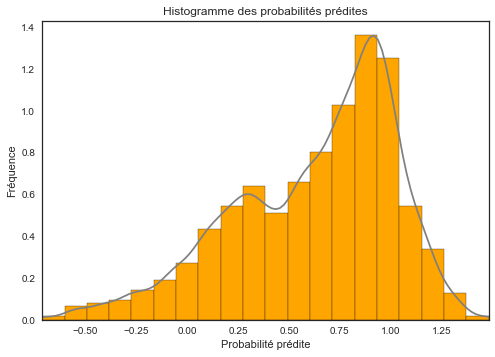

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("white")

# Visualisation des prédictions
plt.hist(ben_lin_pred, bins = 20, color = "orange", ec="black", normed = True)
sns.kdeplot(np.array(ben_lin_pred), bw=0.06, color = "grey")
plt.xlim(ben_lin_pred.min(), ben_lin_pred.max())
plt.ylabel("Fréquence")
plt.title("Histogramme des probabilités prédites")
plt.xlabel("Probabilité prédite")
plt.show()

Quiz : Identifier l'un des problèmes du modèle de probabilité linéaire.

- Une des limites importantes du modèle de probabilité linéaire est qu'aucune contrainte n'existe sur les valeurs de ses prédictions. Il peut donc prédire des probabilités négatives ou supérieures à un, ce qui a peu de sens.
- Ceci étant, rien n'empêche d'utiliser ces prédictions. S'il est décidé que toutes les observations ayant une probabilité prédite supérieure à 0.50 est prédite comme bénigne, les résultats suivant sont obtenus :

In [5]:
import numpy as np

lin_pred = pd.Series(np.where(ben_lin_pred > 0.5, 1, 0))
lin_pred.value_counts()

1    382
0    187
dtype: int64

## 6.2 Mesure de performance

***

- Puisque les modèles de classification prédisent une classe plutôt qu'une valeur numérique, la MSE n'est pas pertinente. Des alternatives existent toutefois.
- Ces alternatives peuvent varier selon que le modèle prédit directement une classe ou qu'il prédit plutôt une probabilité pour chaque classe.
- Plusieurs des mesures de performance pour les modèles prédisant directement une classe repose sur la matrice de confusion (*confusion matrix*). Voici un exemple de matrice de confusion pour une situation à deux classes :

|  Prédiction \ Valeur|  Non-évènement  |  Évènement  |
|:--------------------|:---------------:|:-----------:|
|  Non-évènement      |        TN       |      FN     |
|  Évènement          |        FP       |      TP     |

où TN est un vrai négatif (*true negative*), FN est un faux négatif (*false negative*), FP est un faux positif (*false positive*) et TP est un vrai positif (*true positive*).


- Les cases de la matrice de confusion peuvent contenir le nombre de prédictions se retrouvant dans chacune d'elles où leur poucentage relatif respectif.
- Il est possible de voir que la diagonale de cette matrice représent les prédictions correctes alors que les valeurs hors diagonales sont des prédictions erronées.
- À partir de cette matrice, trois mesures de performance peuvent être dérivées : la précision (*accuracy*), la sensibilité (*sensitivity* ou *recall*) et la spécificité (*specificity*).

- La **précision** représente la proportion des prédictions qui sont correctes. Il s'agit ainsi de la proportion d'observations se retrouvant sur la diagonale de la matrice de confusion. Formellement, la précision est calculée comme

$$accuracy = \frac{\sum_{i=1}^n1(\hat{y}_i = y_i)}{N}$$

où $1(\hat{y}_i = y_i)$ est une fonction indicatrice prenant la valeur un si la prédiction est correcte et zéro autrement et où $N$ est le nombre d'observations sur lesquelles des prédictions ont été effectuées.

- Une mesure parfois utilisée est le taux d'erreur (*error rate*). Il s'agit simplement de un moins la précision, c'est-à-dire la proportion des prédictions qui sont incorrectes.
- La précision possède toutefois quelques limites. D'abord, elle ne distingue pas le type d'erreur effectuée (e.g. ne pas diagnostiquer un cancer peut être plus grave que diagnostiquer un par erreur). 
- Elle est également sensible à la fréquence des évènements (e.g. pour un évènement rare, par exemple 1 par 1000, toujours prédire "pas d'évènement" donne une précision de 99,99%).
- La sensibilité et la spécificité permettent de répondre à ces limites.

- La **sensibilité** représente la proportion d'évènements correctement prédits. Elle se calcule ainsi :

$$sensitivity = \frac{\sum_{i=1}^n1(\hat{y}_i = y_i \cap y_i = 1)}{\sum_{i=1}^n1(y_i = 1)}$$

- Elle est parfois appelée le taux de vrais positifs (*true positive rate*) ou le rappel (*recall*).
- Dans la matrice de confusion, la sensibilité est le résultat du nombre d'observations dans la case *TP* divisé par la somme des observations se retrouvant dans la colonne *Évènement* (*TP + FN*).
- La **spécificité** est quant à elle la proportion de non-évènements correctement prédits. Elle se calcule ainsi :

$$specificity = \frac{\sum_{i=1}^n1(\hat{y}_i = y_i \cap y_i = 0)}{\sum_{i=1}^n1(y_i = 0)}$$

- Elle est parfois appelée le taux de vrais négatifs (*true negative rate*).
- Dans la matrice de confusion, la spécificité est le résultat du nombre d'observations dans la case *TN* divisé par la somme des observations se retrouvant dans la colonne *Non-évènement* (*FP + TN*).

- Il a été mentionné précédemment que les mesures précédentes s'appliquent aux modèles prédisant directement des classes.
- Par contre, si le modèle prédit une probabilité, un seuil peut être sélectionné pour attribuer les prédictions à chacune des classes. C'est ce qui a été fait dans l'exemple du modèle de probabilité linéaire. les mesures précédentes peuvent alors être utilisées par ce modèle.
- Un seuil intuitif est 0.5. Il n'est toutefois pas le seul choix possible.
- Le choix du seuil affecte les trois mesures de performance vu prédécemment.

Quiz : Il existe un arbitrage entre la sensibilité et la spécificité. Pourquoi?

- Plus le seuil est choisi de façon à détecter tous les évènements (maximiser la sensibilité), plus de faux positifs surviendront. Plus le seuil est choisi de façon à détecter tous les non-évènements (maximiser la spécificité), plus de faux négatifs surviendront.
- La sensibilité se concentre sur les évènements. Elle est préférable lorsque les faux positifs sont plus acceptables (e.g. détection de transactions frauduleuses).
- La spécificité se concentre sur les non-évènements. Elle est préférable lorsque les faux négatifs sont plus acceptables (e.g. détection de *spams*.)
- Une façon de représenter cet arbitrage est la courbe ROC (*receiver operating characteristic*).
- La **courbe ROC** est créée en évaluant les probabilités prédites par le modèle pour différents seuils. Pour chaque seuil considéré, la sensibilité et la spécificité sont calculées et représentées graphiquement l'une par rapport à l'autre.

- Considérons l'exemple de la régression précédente. La matrice de confusion de même que la précision pour un seuil à 0.5 sont obtenues ainsi :

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

conf_mat = confusion_matrix(lin_pred, benign)
print("La matrice de confusion :\n", conf_mat,
      "\n--------\nLa précision du modèle :\n",
      np.round(accuracy_score(lin_pred, benign), 3),
      "\n--------\nLa précision d'un modèle naïf \
\n(prédictions toujours égales à 1) :\n", np.round(benign.mean(), 3))

La matrice de confusion :
 [[179   8]
 [ 33 349]] 
--------
La précision du modèle :
 0.928 
--------
La précision d'un modèle naïf 
(prédictions toujours égales à 1) :
 0.627


Pour un seuil à 0.5, la sensibilité et la spécificité du modèle sont obtenues ainsi :

In [7]:
from sklearn.metrics import recall_score

print("La sensibilité du modèle :\n",
      np.round(recall_score(lin_pred, benign), 3),
      "\n-------")

tn = conf_mat[0, 0]
fn = conf_mat[0, 1]
specificity = tn / (tn + fn)

print("La spécificité du modèle :\n",
      np.round(specificity, 3))

La sensibilité du modèle :
 0.914 
-------
La spécificité du modèle :
 0.957


- Enfin, la courbe ROC du modèle peut être obtenue ainsi :

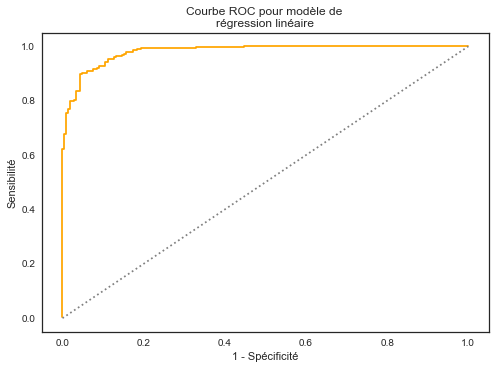

In [8]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(benign, ben_lin_pred)
plt.plot(fpr, tpr, color = "orange")
plt.plot([0, 1], [0, 1], color = "grey", linestyle = ":")
plt.xlabel("1 - Spécificité"), plt.ylabel("Sensibilité")
plt.title("Courbe ROC pour modèle de \nrégression linéaire")
plt.show()

- La courbe ROC permet une évaluation plus riche d'un modèle prédisant des probabilités puisqu'elle ne nécessite pas de déterminer un seuil de façon *ad hoc*.
- Plus la courbe ROC tend vers le coin supérieur gauche, plus le modèle prédictif performe bien. Inversement, un modèle dont la courbe ROC se retrouve sur la ligne pointillée ne ferait pas mieux qu'un tirage aléatoire.
- La courbe ROC permet également de comparer deux modèles en représentant côte-à-côte leur courbe ROC respective.
- Si la courbe d'un premier modèle est supérieure en tous points à celle d'un second modèle, le premier modèle possède un meilleur pouvoir prédictif.

- Enfin, une autre mesure de performance d'un modèle de classification binaire prédisant des probabilités est l'**aire sous la courbe ROC** : (*area under cruve, AUC*).
- L'AUC pour un modèle prédisant parfaitement les classes est de 1 tandis qu'elle est de 0.5 pour un modèle ne faisant pas mieux qu'un processus aléatoire.

In [9]:
import numpy as np
from sklearn.metrics import roc_auc_score

print("AUC du modèle linéaire :", np.round(roc_auc_score(benign, ben_lin_pred), 5))

AUC du modèle linéaire : 0.9808


En somme :

- Il existe de nombreuses mesures de performance pour les modèles de classification. Seules quelques une ont été présentées ici.
- La précision est très utile si les classes ne sont bien réparties. Sinon, la sensibilité et la spécificité peuvent être plus pertinentes.
- Les courbres ROC sont un outil très utile pour visualiser l'arbitrage entre la sensibilité et la spécificité. Elle permettent également d'exploité toute l'information fournies par les modèles prédisant des probabilités plutôt que des classes directement.

## 6.3 Régression logistique

***

- Dans le cas où la variable dépendante prend seulement deux valeurs, il est possible d'écrire :

$$y_i = \bigg\{ \begin{array}{c c}
1 \\
0
\end{array}$$

- $y_i$ suit donc une loi Bernouilli :

$$\Pr(y_i) = \pi_i^{y_i}(1-\pi_i)^{(1 - y_i)}$$

où $\pi_i = \Pr(y_i = 1)$.

- Il a été montré précédemment que dans le cas du modèle de probabilité linéaire, $\pi_i$ se modélise ainsi

$$\Pr(y_i = 1| x_i) = \pi_i = x_i'\beta$$

- Il a également été démontré que ce modèle est problématique puisque $\hat{\pi}_i$, c'est-à-dire la prédiction du modèle, n'est pas bornée entre zéro et un.

- La régression logistique impose une structure entre $\pi_i$ et $x_i'\beta$ de façon à ce que la probabilité $\pi_i$ soit bien définie entre zéro et un.
- Formellement, la régression logistique impose 

$$\pi_i = \frac{\exp\{x_i'\beta\}}{1 + \exp\{x_i'\beta\}}$$

- Comme il est possible de le voir, si $x_i'\beta \rightarrow \infty$, alors $\pi_i \rightarrow 1$ tandis que si $x_i'\beta \rightarrow -\infty$, alors $\pi_i \rightarrow 0$.
- Cette structure est parfois écrite de façon alternative

$$\pi_i = \text{Logit}^{-1}(x_i'\beta) = \Lambda(x'_i\beta)$$

- En effet, après quelques manipulations simples, il est possible de montrer que

$$x'\beta = \text{Logit}(\pi_i) = \ln\frac{\pi_i}{1 - \pi_i}$$

- Ainsi, la distribution de $y$ peut être réécrite :

$$\Pr(y_i| x_i) = \Lambda(x'_i\beta)^{y_i}\left(1-\Lambda(x'_i\beta)\right)^{(1 - y_i)}$$

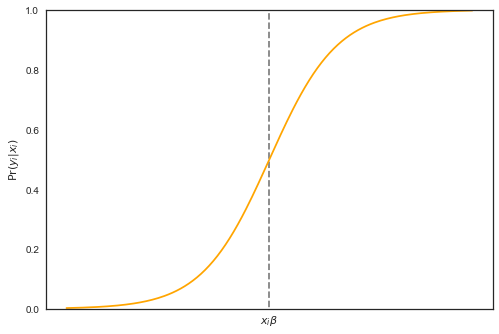

In [10]:
#fonction de répartition de la loi logistique
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-6, 6, 200)
Y = 1 / (1 + np.exp(-X))
plt.plot([0, 0], [-1, 1.1], color = "grey", linestyle = "--")
plt.ylim(0, 1); plt.xlabel(r"$x_i\beta$"); plt.ylabel(r"$\Pr(y_i|x_i)$")
plt.plot(X, Y, color = "orange")
plt.xticks([])
plt.show()

**Estimateur du maximum de vraisemblance**

- La théorie des probabilités stipule que si deux évènements sont indépendants, alors leur probabilité jointe est simplement le produit de leur probabilité marginale :

$$\Pr(y_i, x_i) = \Pr(y_i)\Pr(x_i)$$


- L'estimation du maximum de vraisemblance (*maximum likelihood estimator*, MLE) repose sur l'hypothèse que les observations composant l'échantillon ont été sélectionnées dans une même distribution de façon aléatoire et donc **indépendamment les unes des autres**.
- Ainsi, leur probabilité jointe est simplement le produit de leur probabilité individuelle :

$$\Pr(y_1, y_2, ..., y_n) = \Pr(y_1)\Pr(y_2),...,\Pr(y_n)$$

où $\Pr(y_i)$ est la probabilité que l'observation $i$ soit observée. Ainsi, $\Pr(y_1, y_2, ..., y_n)$ représente la probabilité d'observer l'échantillon composé de $n$ observations.

- La fonction représentant $\Pr(.)$ dépend généralement d'un ou de plusieurs paramètres $\theta$. Le produit ci-haut peut donc être réécrit tel que 

$$\Pr(y_1, y_2, ..., y_n; \theta) = \Pr(y_1; \theta)\Pr(y_2; \theta),...,\Pr(y_n; \theta)$$

où $\theta$ est un vecteur de paramètres.
- Puisque l'hypothèse postule que les observations proviennent de la même distribution, $\theta$ est le même pour toutes les observations.
- Le vecteur de paramètres $\theta$ est généralement inconnu. Il est alors possible d'écrire une fonction définissant comment le produit des probabilités ci-haut varie selon la valeur des paramètres $\theta$ :

$$L(\theta) = \prod_{i=1}^N\Pr(y_i; \theta)$$

- Cette expression est connue sous le nom de **fonction de vraisemblance** (*likelihood function*).

- La vraisemblance est une fonction représentant la probabilité que l'échantillon disponible soit observé pour différentes valeurs de $\theta$.

Exemple : 

- Soit une variable $age = \{42, 24, 36, 29, 51\}$ provenant d'une distribution normale.
- Un analyste est intéressé à estimer la moyenne de la population à partir de cet échantillon.
- Soit deux valeurs candidates pour la moyenne de la variable age : $\theta = \{10, 37\}$.
- Quiz : Pour l'analyste, quelle valeur de $\theta$ est la plus probable, sachant l'échantillon qu'il observe?

- La fonction de vraisemblance repose sur cette intuition.
- Elle retourne différentes valeurs pour différents $\theta$ candidats. La plus grande valeur qu'elle retourne (le maximum de la fonction de vraisemblance) se trouve au $\theta$ le plus probable sachant l'échantillon observé.
- Trouver le maximum de la fonction est alors simplement un problème d'optimisation.
- Puisque la fonction de vraisemblance est le résultat du produit des probabilités individuelles, prendre le logarithme de celle-ci permet d'obtenir la fonction suivante :

$$\text{ln} L(\theta) = l(\theta) = \sum_{i=1}^n\text{ln}\left[\Pr(y_i;\theta)\right]$$

- Cette transformation est souhaitable puisqu'elle permet de mieux faire converger le modèle.
- Il est possible de montrer que cette transformation ne change pas la valeur du maximum de la fonction.
- Il est à noter que l'estimateur du maximum de vraisemblance est l'un des estimateurs les plus répandus en statistique, car il possède des propriétés statistiques très intéressantes.

- Le vecteur de paramètres $\theta$ est alors obtenu en solutionnant le problème de maximisation suivant :

$$\max_{\theta} ~ l(\theta) = \sum_{i=1}^n\text{ln}\left[\Pr(y_i;\theta)\right]$$

- Ici, $\Pr(y_i;\theta)$ n'est pas définie. Dans le cas de la régression logistique, celle-ci peut être remplacée par $\Pr(y_i| x_i)$ vue ci-haut de façon à obtenir :


$$
\begin{aligned}
\max_{\beta} ~ l(\beta) & = \sum_{i=1}^n\text{ln}\left[\Lambda(x'_i\beta)^{y_i}\left(1-\Lambda(x'_i\beta)\right)^{(1 - y_i)}\right] \\
& = \sum_{i=1}^n\left(\text{ln}\left[\Lambda(x'_i\beta)^{y_i}\right] + \text{ln}\left[\left(1-\Lambda(x'_i\beta)\right)^{(1 - y_i)}\right]\right) \\
& = \sum_{i=1}^n y_i\text{ln}\left[\Lambda(x'_i\beta)\right] + \sum_{i=1}^n(1-y_i)\text{ln}\left[(1-\Lambda(x'_i\beta)\right]
\end{aligned}
$$

- Pour résoudre le problème de maximisation

$$\max_{\beta} ~ l(\beta) = \sum_{i=1}^n y_i\text{ln}\left[\Pr(y_i|x_i;\theta)\right] + \sum_{i=1}^n(1-y_i)\text{ln}\left[\Pr(y_i|x_i;\theta)\right]$$
(où l'expression $\Pr(y_i|x_i;\theta)$ a été conservée afin d'alléger la notation).

- Il suffit encore une fois de prendre la première dérivée et de l'égaliser à zéro, telle que 

$$\frac{\partial l(\beta)}{\partial\beta} \Rightarrow \sum_{i=1}^ny_i\frac{\Pr'(y_i|x_i;\theta)}{\Pr(y_i|x_i;\theta)}x_i - \sum_{i=1}^n(1 - y_i)\frac{\Pr'(y_i|x_i;\theta)}{\left(1-\Pr(y_i|x_i;\theta)\right)}x_i = 0$$


- Il est possible de montrer que si $\Pr(y_i|x_i;\theta) = \frac{\exp\{x_i'\beta\}}{1 + \exp\{x_i'\beta\}}$, alors $\Pr'(y_i|x_i;\theta) = \Pr(y_i|x_i;\theta)\left(1-\Pr(y_i|x_i;\theta)\right)$.
- À l'aide de cette égalité, l'équation ci-haut peut être réécrite telle que :

$$
\sum_{i=1}^ny_i\frac{\Pr(y_i|x_i;\theta)\left(1-\Pr(y_i|x_i;\theta)\right)}{\Pr(y_i|x_i;\theta)}x_i - \sum_{i=1}^n(1 - y_i)\frac{\Pr(y_i|x_i;\theta)\left(1-\Pr(y_i|x_i;\theta)\right)}{\left(1-\Pr(y_i|x_i;\theta)\right)}x_i = 0 \\
\sum_{i=1}^ny_i\left(1-\Pr(y_i|x_i;\theta)\right)x_i - \sum_{i=1}^n(1 - y_i)\Pr(y_i|x_i;\theta)x_i = 0 \\
\sum_{i=1}^n \left(y_i-\Pr(y_i|x_i;\theta)\right)x_i = 0
$$

- Il n'existe pas de solution analytique à cette équation. Une méthode numérique doit être utilisée pour obtenir le vecteur $\hat{\theta}$ solutionnant cette équation.

- En remplaçant l'expression $\Pr(y_i|x_i;\theta)$ par $\Lambda(x'_i\beta)$, il est possible de remarquer que $\hat{\theta}$ est alors remplacé par $\hat{\beta}$.
- Une fois le vecteur de paramètres $\hat{\beta}$ obtenu, celui-ci peut être utilisé afin d'obtenir des prédictions pour un nouveau $x_i$ de la façon suivante :

$$\hat{\pi}_i = \frac{\exp\{x_i'\hat{\beta}\}}{1 + \exp\{x_i'\hat{\beta}\}}$$

où $\hat{\pi}_i$ est la probabilité prédite par le modèle que $y_i$ soit égal à un pour l'observation $i$.
- Encore une fois, cette forme à l'avantage de produire des prédictions bornées entre zéro et un.

- Contrairement à la régression linéaire, les coefficients estimés par régression logistique ne peuvent être interprétés directement. En effet, dans le cas de la régression linéaire :

$$E[y|X] = X\beta$$
$$\Rightarrow \frac{\partial E[y|X]}{\partial x_j} = \beta_j$$

- Dans le cas de la régression logistique :

$$\Pr(y=1|X) = \Lambda(X\beta)$$
$$\Rightarrow \frac{\partial \Pr(y=1|X)}{\partial x_j} = \Lambda'(X\beta)\beta_j$$

où la valeur de $\Lambda'(X\beta)\beta_j$ dépend de la matrice $X$.

- Toutefois, puisque $\Lambda'(X\beta)$ est une fonction de densité, celle-ci est toujours définie positive. Ainsi, $\Lambda'(X\beta)\beta_j$ prend nécessairement le signe de $\beta_j$.
- Une valeur positive de $\beta_j$ veut dire qu'une augmentation de la variable $x_j$ augmente la probabilité que la classe 1 soit observée. Une valeur négative de $\beta_j$ signifie plutôt que la probabilité que la classe 1 soit observée diminue.

- Exemple avec le jeu de données sur le cancer du sein :

In [11]:
from statsmodels.discrete.discrete_model import Logit

logit = Logit(benign, bc_cov)
logit_res = logit.fit(disp = False)

- L'option `disp` permet de décider si les informations concernant la converge du modèle doivent être affichées.

In [12]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  569
Model:                          Logit   Df Residuals:                      559
Method:                           MLE   Df Model:                            9
Date:                Thu, 12 Apr 2018   Pseudo R-squ.:                  0.8045
Time:                        11:42:02   Log-Likelihood:                -73.435
converged:                       True   LL-Null:                       -375.72
                                        LLR p-value:                2.189e-124
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
mean radius                1.0360     10.822      0.096      0.924     -20.175      22.247
mean texture              -1.6538      0.276     -5.993      0.000      -2.195      -1.113
mean

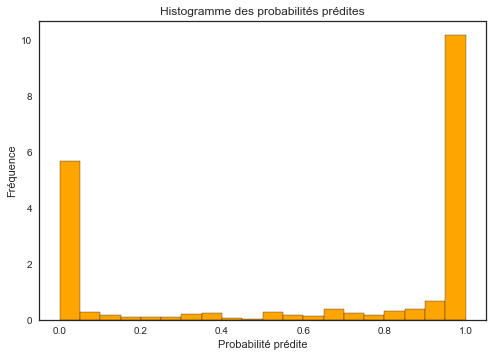

In [13]:
import matplotlib.pyplot as plt
import numpy as np

logit_pred = logit_res.predict(bc_cov)

# Visualisation des prédictions
plt.hist(logit_pred, bins = 20, color = "orange", ec="black", normed = True)
plt.ylabel("Fréquence")
plt.title("Histogramme des probabilités prédites")
plt.xlabel("Probabilité prédite")
plt.show()

- Puisque `Logit` ne provient pas de SciKit-Learn, son évaluation par validation coisée doit être faite "à la main".

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from statsmodels.discrete.discrete_model import Logit

# initialisation de la validation croisée
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 222)
k_fold.get_n_splits(bc_cov)

# validation croisée pour calculer la performance de la régression logistique
logit_cv = []
for train, test in k_fold.split(bc_cov):
    logit_temp = Logit(benign.values[train], bc_cov.values[train])
    res_temp = logit.fit(disp = False)
    pred_temp = res_temp.predict(bc_cov.values[test])
    auc_temp = roc_auc_score(benign.values[test], pred_temp)
    logit_cv.append(auc_temp)

In [15]:
print("L'AUC du modèle : \n",
    np.round(np.mean(logit_cv), 5))

L'AUC du modèle : 
 0.9905


- Comme il est possible de le voir, un modèle simple comme la régression logistique peut produire de très bonnes prédictions.
- Il est important de rappeler que les modèles simples peuvent souvent faire très bien le travail dans des problèmes de prédiction.

**Extension**

- Tout comme la régression linéaire, la régression logistique peut souffrir de problème de multicolinéarité. 
- Tout comme la régression linéaire, ce problème peut être abordé en imposant des contraintes sur les paramètres.
- Ces modèles ne sont toutefois pas couvert ici. Voir la documentation de SciKit-Learn sur la régression logistique pour en apprendre davantage.

En somme

- La régression logistique palie à la limite du modèle de probabilité linéaire en contraignant la relation entre $y$ et $X$.
- Cette structure permet notamment de s'assurer que les préditions soient bornées entre zéro et un.
- La régression logistique repose toutefois sur des hypothèses relativement fortes, puisqu'elle impose également des effets additifs.
- C'est néanmoins, encore à ce jour, l'une des méthodes de classification les plus utilisées, puisqu'elle demeure simple et rapide, tout en ayant souvent une très bonne performance.

## 6.4 Retour sur certaines méthodes

***

- Certaines des méthodes vues dans le module sur la régression possèdent un équivalent naturel en classification. C'est notamment le cas de la méthode des k plus proches voisins, des arbres de régression et des *random forests*.

**K plus proches voisins**

- Un des modèles vus au module précédent et imposant le moins d'hypothèses sur la structure des données est la méthode des KNN.
- L'idée de cette méthode en régression est d'effectuer la moyenne de la variable dépendante des $k$ plus proches observations et d'utiliser cette moyenne comme valeur prédite.
- En classification, la méthode fonctionne de façon similaire. Toutefois, plutôt que d'utiliser la moyenne, le mode est utilisé. Ainsi, si $k = 5$ et que la classe pour $y$ des 5 observations est $\{1,0,0,0,1\}$, la classe 0 sera prédite.
- Si $k$ est paire et que la variable dépendante est parfaitement distribuée parmi les observations, la valeur de l'observation la plus près sera généralement utilisée.
- Il est également possible d'obtenir des probabilités plutôt qu'une classe en calculant la proportion que représente chacune des classes dans la feuille.

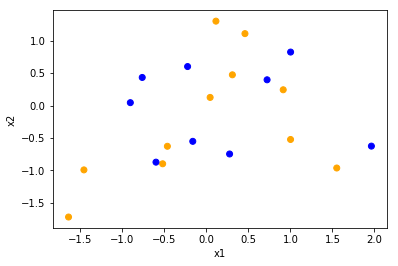

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# création d'un jeu de données jouet
n = 20
np.random.seed(222)
x1 = np.random.randn(n)
x2 = np.random.randn(n)
color = ["orange", "blue"]
y = np.random.choice(color, n, p = [0.5] * 2)

plt.scatter(x1, x2, c = y)
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

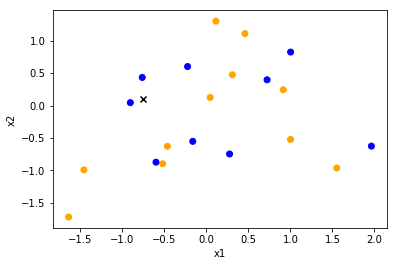

In [40]:
plt.scatter(x1, x2, c = y)
plt.scatter([-.75], [0.1],
            c = "black", marker = "x")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

- Quiz : Quelle valeur devrait être prédite pour le nouveau point `x`?

In [83]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Paramètres à évaluer pour la validation  croisée
params = {"n_neighbors" : np.arange(1, 15, 1)}

# Paramétrisation de la validation croisée
cv_knn = GridSearchCV(knn, param_grid = params,
                      scoring = "roc_auc")

# Sélection des hyperparamètres par CV
cv_knn.fit(bc_cov, benign)

cv_knn.best_params_

{'n_neighbors': 14}

In [84]:
from sklearn.model_selection import cross_val_score

# Estimation de l'AUC par nested CV
nested_knn = cross_val_score(cv_knn, bc_cov, benign,
                              cv = 10,
                             scoring = "roc_auc")
print("Nested CV AUC du modèle KNN :", np.round(nested_knn.mean(), 5))

Nested CV AUC du modèle KNN : 0.98052


**Arbre de classification**

- L'arbre de classification est l'un des deux types d'arbre de décision. Contraitrement, à l'arbre de régression, l'arbre classification prédit une classe plutôt qu'une valeur.
- L'estimation de l'arbre de classification est similaire à celle de l'arbre de régression. À chaque noeud, l'algorithme cherche à minimiser l'impureté des deux noeuds nouvellement créés en évaluant chaque valeur de chaque variable explicative qui lui est fournie.
- Les divisions se poursuivent jusqu'à ce qu'une règle d'arrêt est atteinte. Les règles d'arrêt sont les mêmes que celles pour un arbre de régression.
- Lorsque l'arbre est construit, celui-ci retourne pour chaque feuille la classe correspondant au mode de la variable dépendante (plutôt que la moyenne dans le cas d'un arbre de régression).
- Comme avec le modèle KNN, il est également possible d'obtenir des probabilités plutôt qu'une classe en calculant la proportion que représente chacune des classes dans la feuille.

- Pour rappel, l'impureté se mesure ainsi :

$$G(Q, \theta) = \frac{N_1}{N_1 + N_2}H(Q_1(\theta)) + \frac{N_2}{N_1 + N_2}H(Q_2(\theta))$$


où $N_1$ et $N_2$ sont le nombre d'observations se retrouvant respectivement dans les noeuds potentiels 1 et 2, où $Q_1(\theta) = (y_i, x_i)~~ | ~~ x_i <= \theta$, où $Q_2(\theta) = (y_i, x_i)~~ | ~~ x_i > \theta$ et où $\theta$ est le seuil à déterminer.

- Dans le cas de la classification, l'impureté capte la distribution des classes dans un noeud. Plus les classes sont bien séparées, plus chacun des noeuds créés lors de la division contient une proportion élevée de seulement une des classes, et plus le noeud est pur. Cette proportion $p_{kj}$ pour une classe $k$ dans un noeud $j$ est obtenue ainsi :

$$\hat{p}_{kj} = \frac{1}{N_j}\sum_{i=1}^{N_j}1(y_i = k)$$

où $N_j$ est le nombre d'observations se trouvant dans le noeud $j$ et où $1(y_i = k)$ est une fonction indicatrice prenant la valeur un si la valeur dépendante de l'observation $i$ est égale à la classe $k$ et zéro autrement.

Critères de division

- Le premier critère de division mesurant l'impureté est l'**index de Gini**. Il est calculé ainsi :

$$H(X_{j}) = \sum_{k=1}^K\hat{p}_{kj}(1 - \hat{p}_{kj})$$

- Ainsi, si les classes sont parfaitement séparées, $\hat{p}_{kj} = 1$ pour la classe $k$ et $\hat{p}_{-kj} = 0$ pour les autres classes. L'index de Gini est alors égal à zéro. Le noeud ne possède alors aucune impureté.


- Un second critère d'impureté est l'**entropie**.
- L'entropie fait référence à la théorie de l'information. Il s'agit du niveau de désorganisation ou d'incertitude dans un système. Plus un système possède une entropie élevée, plus ce système est incertain.
- Il est ainsi possible de faire un corrolaire en probabilité. Pour une situation où il existe une probabilité qu'un évènement survienne, plus cette probabilité est élevée, plus l'évènement est susceptible d'avoir lieu, moins la situation est incertaine et donc moins l'entropie de cette situation est élevée.
- Dans le cas des noeuds créés lors de l'estimation de l'arbre de classification, la même logique s'applique. Plus un noeud est pur, plus la proportion relative de l'une des classes y est importante et plus son entropie est faible. 
- L'entropie se calcule de la façon suivante :

$$H(X_{j}) = - \sum_{k = 1}^K\hat{p}_{kj}\log \hat{p}_{kj}$$

- Encore une fois, si les classes sont parfaitement séparées, $\hat{p}_{kj} = 1$ pour la classe $k$ et $\hat{p}_{-kj} = 0$ pour les autres classes. L'entropie est alors égale à zéro ($\log(1) = 0$).

Quiz : Dans les deux mesures d'impureté qui viennent d'être présentées, quelle est la valeur de $\hat{p}_{kj}$ où l'impureté est la plus importante (dans le cas où il y deux classes)?

In [85]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

clf_tree = DecisionTreeClassifier()

# Paramètres à évaluer pour la validation  croisée
params = {"max_depth" : np.arange(1, 15, 1),
          "min_samples_leaf" : np.arange(1, 11, 1),
          "min_samples_split" : np.arange(2, 15, 1)}

# Paramétrisation de la validation croisée
cv_tree = GridSearchCV(clf_tree, param_grid = params,
                       scoring = "roc_auc")

# Sélection des hyperparamètres par CV
cv_tree.fit(bc_cov, benign)

# Estimation de l'AUC par nested CV
nested_tree = cross_val_score(cv_tree, bc_cov, benign,
                              cv = 10,
                              scoring = "roc_auc")

CPU times: user 3min 22s, sys: 128 ms, total: 3min 22s
Wall time: 3min 22s


- Les résultats pour cet arbre sont les suivants :

In [89]:
print("Nested CV AUC du meilleur modèle :", np.round(nested_tree.mean(), 5),
      "\nParamètres sélectionnés :", cv_tree.best_params_) 

Nested CV AUC du meilleur modèle : 0.95503 
Paramètres sélectionnés : {'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 9}


- Il est ensuite possible de visualiser l'arbre :

In [93]:
import graphviz
from sklearn.tree import export_graphviz
import pydot

# Enregistrement de l'arbre en .dot
export_graphviz(cv_tree.best_estimator_,
                feature_names = bc_cov.columns,
                out_file="class_tree.dot")

# Conversion du fichier .dot en format .png
(graph,) = pydot.graph_from_dot_file("class_tree.dot")
graph.write_png("class_tree.png")

True

![](class_tree.png)

**Forêt aléatoire**

- Le modèle de forêt aléatoire applique la même idée dans le cas de la classification que dans celui de la régression, c'est-à-dire l'aggrégation des résultats de plusieurs arbres pour effectuer une prédiction.
- Dans le cas de la classification, c'est la classe qui est obtenue le plus souvent comme prédiction (le mode) parmi les prédictions de tous les arbres qui est utilisée comme prédiction du modèle de forêt aléatoire.

In [94]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Paramétrisation du random forest
rf_model = RandomForestClassifier(n_estimators = 100,
                                  criterion = "gini",
                                  random_state = 222,
                                  max_features = 0.30,
                                  n_jobs = 2)

# Paramétrisation de la validation croisée du random forest
# avec les mêmes paramètres candidats que l'arbre de classification
cv_rf = GridSearchCV(rf_model, param_grid = params,
                        scoring = "roc_auc")

cv_rf.fit(bc_cov, benign)

CPU times: user 17min 8s, sys: 2min 21s, total: 19min 30s
Wall time: 35min 3s


- Le modèle estimé est ensuite évalué à l'aide d'une validation croisée :

In [95]:
%%time

rf_cv = cross_val_score(cv_rf, bc_cov, benign,
                         cv = 10, scoring = "roc_auc")

print("Nested CV AUC :", np.round(np.mean(rf_cv), 5))

Nested CV AUC : 0.98019
CPU times: user 2h 45min 50s, sys: 22min 54s, total: 3h 8min 45s
Wall time: 5h 50min 1s


## 6.5 Classification naïve bayésienne

***

- La classification naïve bayésienne (*naive bayes*) repose sur le théorème de Bayes :

$$\Pr(y_i = c|x_i) = \frac{\Pr(x_i|y_i = c)\Pr(y_i = c)}{\Pr(x_i)}$$

où $\Pr(y_i = c|x_i)$ est la probabilité *a posteriori* (*posterior*) que $y_i$ soit égal à la classe $c$ conditionnelle à $x_i$, où $\Pr(x_i|y_i = c)$ est la vraisemblance (*likelihood*) de $x_i$ conditionnelle à ce que $y_i$ soit égal à la classe $c$, où $\Pr(y_i = c)$ est la probabilité *a priori* (*prior*) que $y_i$ soit égal à la classe $c$ et où $\Pr(x_i)$ est la probabilité *a priori* de $x_i$.
- Ce théorème peut être utilisé pour faire de la classification. Ce théorème peut être calculée pour chaque classe $c$. La valeur prédite est celle aossiciée à la probabilité la plus grande.

- La classification naïve bayésienne prédit donc de la façon suivante :

$$\hat{y}_i = \underset{y}{\text{argmax}} \frac{\Pr(x_i|y_i = c)\Pr(y_i = c)}{\Pr(x_i)}$$

- Le problème est donc simplementy d'estimer $\hat{\Pr}(x_i|y_i = c)$, $\hat{\Pr}(y_i = c)$ et $\hat{\Pr}(x_i)$.

- Quiz : Comment faire?

- Pour $\hat{\Pr}(y_i = c)$, il est possible d'utiliser la proportion de chacune des classes observée dans l'échantillon :

$$\hat{\Pr}(y_i = c) = \frac{1}{N}\sum_{i=1}^N 1(y_i = c)$$

où $1(y_i = c)$ est une fonction inidicatrice prenant la valeur 1 si la variable dépendante de l'inidividu $i$ provient de la classe $c$ et 0 autrement.

- Pour $\hat{\Pr}(x_i|y_i = c)$, les choses sont plus compliquées, puisque

$$\Pr(x_i|y_i = c) = \Pr(x_{1i}|x_{2i}, x_{3i}, ..., x_{ki}, y_i = c)\Pr(x_{2i}|x_{3i}, ..., x_{ki}, y_i = c)...\Pr(x_{ki}|y_i = c)$$

- Or, les probabilités conditionnelles partielles individuelles ne sont pas connues et difficilement estimable.

- Solution : l'indépendance des variables explicatives est supposée. De cette façon 

$$
\begin{aligned}
\Pr(x_i|y_i = c) & = \Pr(x_{i1}|x_{i2}, x_{i3}, ..., x_{ik}, y_i = c)\Pr(x_{i2}|x_{i3}, ..., x_{ik}, y_i = c)...\Pr(x_{ik}|y_i = c) \\
& = \Pr(x_{i1}| y_i = c)\Pr(x_{i2}|y_i = c)...\Pr(x_{ik}|y_i = c) \\
& = \prod_{j=1}^K \Pr(x_{ij}| y_i = c)
\end{aligned}
$$

- Cette hypothèse simplifie drôlement les choses!
- Est-elle réaliste? Non! Est-ce problématique? Étonnament, pas tellement!
- Ainsi, les probabilités des variables explicatives peuvent être estimées indépendamment les une des autres pour chacune des classes.

- Si $x_j$ est discrête,  $\Pr(x_{ij}| y_i = c)$ est estimée par la proportion empirique observée dans l’échantillon :

$$\hat{\Pr}(x_{ij}| y_i = c) = \frac{1}{N_c}\sum_{i=1}^N x_i$$

où $N_c$ est le nombre d'observations ayant comme valeur de la variable dépendante la classe $c$.

- Si $x_j$ est continue, $\Pr(x_{ij}| y_i = c)$ est modélisée par une loi normale telle que 

$$x_j \sim N(\bar{x}_{jc}, \sigma_{jc}^2)$$

où $\bar{x}_{jc}$ et $\sigma_{jc}^2$ sont respectivement la moyenne et la variance empirique de la variable $j$ pour la classe $c$.

- Enfin, puisque $\Pr(x_i)$ sert uniquement à normaliser les prédictions afin qu'elles sommes à un, celle-ci est estimée ainsi :

$$\hat{\Pr}(x_i) = \sum_{j=1}^k\hat{\Pr}(x_i|y_i = c)\hat{\Pr}(y_i = c)$$

Ainsi, la classification naïve bayésienne prédit donc de la façon suivante :

$$\hat{y}_i = \underset{y}{\text{argmax}} \frac{\hat{\Pr}(x_i|y_i = c)\hat{\Pr}(y_i = c)}{\sum_{j=1}^k\hat{\Pr}(x_i|y_i = c)\hat{\Pr}(y_i = c)}$$

In [16]:
%%time

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
# pour des x discrets, ce serait BernoulliNB

nbayes = GaussianNB()

# le modele naif bayesien n'a pas d'hyperparametre
cv_nbayes = cross_val_score(nbayes, bc_cov, benign,
                              cv = 10,
                              scoring = "roc_auc")

print("Naive Bayes CV AUC :", np.round(np.mean(cv_nbayes), 5))

Naive Bayes CV AUC : 0.97453
CPU times: user 22.1 ms, sys: 1.41 ms, total: 23.6 ms
Wall time: 24.1 ms


Le fait de ne pouvoir estimer un modèle qu'avec un seul type de variable est une limite de l'implémentation de la classification naïve bayésienne dans SciKit-Learn. Néanmoins, puisque l'hypothèse d'indépendance des variables explicatives est faite, une solution peut simplement être d'estimer deux modèles : un avec uniquement les variables discrêtes et un avec uniquement les variables continues. Il est alors possible de prédire les probabilités pour chacun des modèles, les mutiplier ensemble puis normaliser le tout.

En somme, la classification naïve bayésienne possède plusieurs avantages :

- Très simple.
- Très rapide.
- Surprenament performante, malgré l'hypothèse forte d'indépendance des variables explicatives.
- Performe bien lorsqu'il y beaucoup de variables explicatives, ce qui typiquement le cas en analyse de texte. C'est pourquoi elle est notamment utilisée dans la détection de *SPAM*.

## 6.6 Analyse discriminante

***

- La classification naïve bayésienne repose sur l'hypothèse d'indépendance des variables explicatives.
- Hypothèse forte!
- L'analyse discrimante estime le même problème que la classification naïve bayésienne, à savoir

$$\Pr(y_i = c|x_i) = \frac{\Pr(x_i|y_i = c)\Pr(y_i = c)}{\Pr(x_i)}$$

- Or, plutôt que de faire l'hypothèse d'indépendance des variables explicatives, $\Pr(x_i|y_i = c)$ est modélisée à partir d'une loi normale multivariée.

- Ainsi, la structure suivante est supposée

$$\Pr(x_i|y_i = c) = N_p(\mu_c,\Sigma_c)$$

où $c$ représente chacune des classes à prédire.
- Les paramètres $\mu_k$ et $\Sigma_k$ peuvent alors être estimés simplement :

$$\hat{\mu}_c = \frac{1}{N_c}\sum_{i=1}^{N_c}x_i$$

et 

$$\hat{\Sigma}_c = \frac{1}{N_c - 1}\sum_{i=1}^{N_c}(x_i-\hat{\mu}_c)(x_i-\hat{\mu}_c)'$$


- Ensuite, comme pour la classification naïve bayésienne

$$\hat{\Pr}(y_i = c) = \frac{1}{N}\sum_{i=1}^N 1(y_i = c)$$

et 

$$\hat{\Pr}(x_i) = \sum_{j=1}^k\hat{\Pr}(x_i|y_i = c)\hat{\Pr}(y_i = c)$$

- L'analyse discriminante se divise en deux types : linéaire et quadratique.
- **Analyse discriminante linéaire** (*linear discriminant analysis*, LDA) : La matrice $\Sigma$ est commune à toute les classes.

$$\Sigma_c = \hat{\Sigma}$$

- **Analyse discriminante quadratique** (*quadratic discriminant analysis*, QDA) : La matrice $\Sigma$ est propre à chaque classe.

$$\Sigma_c = \hat{\Sigma}_c$$

- La LDA impose une hypothèse plus forte et est moins flexible.
- En contre partie, elle est plus simple computationnellement.
- Également, moins de paramètres à estimer, donc moins de variabilité.

In [17]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()

# le modele n'a pas d'hyperparametre
cv_lda = cross_val_score(lda, bc_cov, benign,
                              cv = 10,
                              scoring = "roc_auc")

print("LDA CV AUC :", np.round(np.mean(cv_lda), 5))

LDA CV AUC : 0.98286


In [18]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA()

# le modele n'a pas d'hyperparametre
cv_qda = cross_val_score(qda, bc_cov, benign,
                              cv = 10,
                              scoring = "roc_auc")

print("QDA CV AUC :", np.round(np.mean(cv_qda), 5))

QDA CV AUC : 0.98449


## 6.7 Classification multi classes

Mesure de performance

- Toutes les mesures de performance couvertes ont été présentées dans le contexte d'une classificartion binaire (2 classes). La matrice de confusion, la précision, la sensibilité et la spécificité se généralise facilement pour le cas à plusieurs classes.
- Certains modèles se généralisent bien à la prédiction multi classes : régression logistique $\right$ régression logistique multinomiale, KNN et arbre de classification (le mode est prédit), classification naïve bayésienne, analyse discriminante ($\Pr(y_i|x_i)$ calculé pour toutes les classes).

Si un modèle ne permet pas la prédiction multi classes, deux solutions existent :

- One-vs-one : crée une série de classifieurs binaires comparant tous les couple de classes possibles.
- One-vs-all : crée une série de classifieurs binaires comparant chaque des classes à toutes les autres simultanément

## 6.7 Devoir

***

Si un modèle de classification est privilégié pour le travail long :

- Choisir et appliquer l'une des méthodes présentées dans le cours.
- Présenter la méthode, ses forces et ses faiblesses.
- Discuter des résultats obtenus.
- Évaluer de façon adéquate la performance du modèle choisi.

## Quiz de révision

1. Pourquoi la précision pourrait ne pas être une mesure de performance pertinente?
2. Pourquoi doit-on imposer des contraites sur la tailles des arbres de décision?
3. Pourquoi un modèle d'apprentissage supervisé permettant d'effectuer de la régression doit être évité pour faire de la classification?

Exemple de solution pour la question 1.

- La précision mesure la proportion de classes prédites correctement. Or, lorsque les classes sont débalancées, c'est-à-dire que l'une des classes est majoritaire et l'autre est rare, la précision peut devenir problématique, puisque les classes prédites n'auront pas le moins impact dans la mesure de celle-ci. En effet, ne jamais bien prédire la classe rare affectera très peu la précision. Dans un cas limite, si une classe est présente seulement 5% du temps, prédire systématiquement la classe majoritaire donnera une précision de 0,95, ou 95%. C'est pourquoi des mesures comment la sensibilité et la spécificité ont été développées.

Exemple de solution pour la question 2.

- Parce qu'autrement, les arbres sont sujets au surapprentissage. En effet, si aucune contrainte n'est imposée sur la taille de l'arbre, celui-ci peut être tenté de faire en sorte que chaque observation ait sa propre feuille. Dans ce cas, les données d'entrainement seront très  bien prédites, mais de nouvelles données risquent de moins bien performées dans ce modèle.

Exemple de solution pour la question 3.

- Parce que les modèles effectuant de la régression tentent de prédire une valeur plutôt qu'une classe. Il n'existe donc aucune contrainte sur les prédictions qu'ils peuvent faire, ce qui peut être problématique lorsque qu'une probabilité doit être prédite par exemple. Cette situation peut en effet résultée en des probabilités prédites prenant des valeurs négatives ou supérieures à un.